# Linear Regression Consulting Project

You've been contracted by Hyundai Heavy Industries to help them build a predictive model for some ships. [Hyundai Heavy Industries](http://www.hyundai.eu/en) is one of the world's largest ship manufacturing companies and builds cruise liners.

You've been flown to their headquarters in Ulsan, South Korea to help them give accurate estimates of how many crew members a ship will require.

They are currently building new ships for some customers and want you to create a model and use it to predict how many crew members the ships will need.

Here is what the data looks like so far:

    Description: Measurements of ship size, capacity, crew, and age for 158 cruise
    ships.


    Variables/Columns
    Ship Name     1-20
    Cruise Line   21-40
    Age (as of 2013)   46-48
    Tonnage (1000s of tons)   50-56
    passengers (100s)   58-64
    Length (100s of feet)  66-72
    Cabins  (100s)   74-80
    Passenger Density   82-88
    Crew  (100s)   90-96
    
It is saved in a csv file for you called "cruise_ship_info.csv". Your job is to create a regression model that will help predict how many crew members will be needed for future ships. The client also mentioned that they have found that particular cruise lines will differ in acceptable crew counts, so it is most likely an important feature to include in your analysis!

Once you've created the model and tested it for a quick check on how well you can expect it to perform, make sure you take a look at why it performs so well!

In [2]:
#Load and Inspect the Data
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Load the data
file_path = '/content/drive/My Drive/Colab Notebooks/Scalable and Distributed Computing/Lab/lab9/cruise_ship_info.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


Mounted at /content/drive
     Ship_name Cruise_line  Age  Tonnage  passengers  length  cabins  \
0      Journey     Azamara    6   30.277        6.94    5.94    3.55   
1        Quest     Azamara    6   30.277        6.94    5.94    3.55   
2  Celebration    Carnival   26   47.262       14.86    7.22    7.43   
3     Conquest    Carnival   11  110.000       29.74    9.53   14.88   
4      Destiny    Carnival   17  101.353       26.42    8.92   13.21   

   passenger_density   crew  
0              42.64   3.55  
1              42.64   3.55  
2              31.80   6.70  
3              36.99  19.10  
4              38.36  10.00  


In [3]:
# Check for missing values
print(data.isnull().sum())

# Encode categorical variables
data = pd.get_dummies(data, columns=['Cruise_line'], drop_first=True)


Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64


In [4]:
#Feature Engineering
from sklearn.preprocessing import StandardScaler

# Selecting features and target
features = data.drop(['Ship_name', 'crew'], axis=1)
target = data['crew']

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [5]:
#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

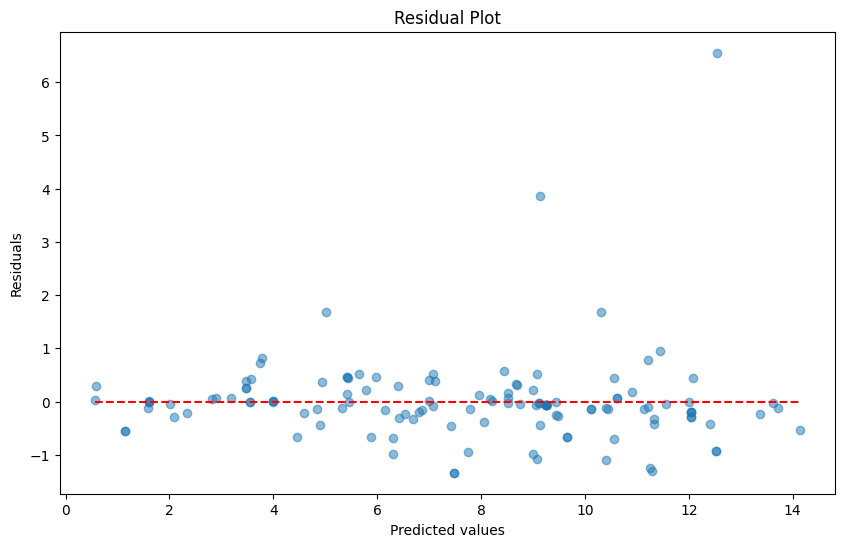

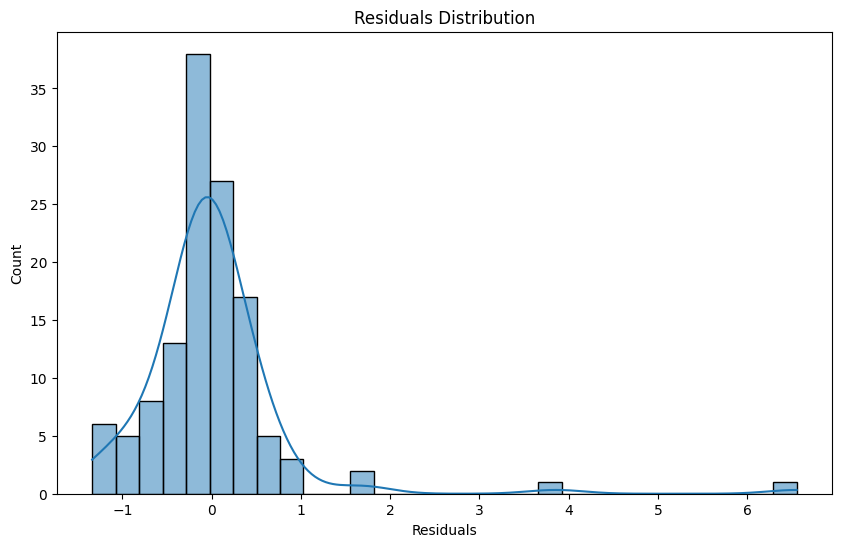

In [6]:
#perform residual analysis to CHECK the assumptions of your linear regression model:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Residuals
residuals = y_train - y_train_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), colors='r', linestyles='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()


In [9]:
# Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.5931457800880022
R-squared: 0.9541954405645605


In [10]:
# Interpretation
# Print model coefficients
coefficients = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
print(coefficients)


                                Coefficient
Age                           -4.070851e-03
Tonnage                        8.123293e-01
passengers                    -6.007449e-01
length                         1.147974e+00
cabins                         2.274661e+00
passenger_density             -9.415285e-02
Cruise_line_Carnival           1.809868e-01
Cruise_line_Celebrity          1.360607e-01
Cruise_line_Costa             -9.082281e-02
Cruise_line_Crystal           -1.181548e-02
Cruise_line_Cunard            -2.381599e-02
Cruise_line_Disney             4.761478e-02
Cruise_line_Holland_American  -1.471627e-01
Cruise_line_MSC               -5.664682e-02
Cruise_line_Norwegian          8.780618e-02
Cruise_line_Oceania            7.264770e-02
Cruise_line_Orient            -1.249001e-15
Cruise_line_P&O               -3.989901e-02
Cruise_line_Princess           1.639381e-03
Cruise_line_Regent_Seven_Seas  8.767834e-02
Cruise_line_Royal_Caribbean   -4.223982e-01
Cruise_line_Seabourn           7

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = poly.fit_transform(features_scaled)

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)

# Perform cross-validation
cv_scores = cross_val_score(ridge_model, features_poly, target, cv=5, scoring='r2')

print(f'Cross-validated R-squared scores: {cv_scores}')
print(f'Mean R-squared score: {cv_scores.mean()}')

# Train the Ridge model on the full dataset
ridge_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression R-squared: {r2_ridge}')


Cross-validated R-squared scores: [-0.448398   -0.22205086 -0.4223106  -0.03015842  0.10102923]
Mean R-squared score: -0.20437772984296512
Ridge Regression Mean Squared Error: 0.8021420204368085
Ridge Regression R-squared: 0.9380561017473475
